In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from pathlib import Path

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path_01 = "/content/drive/My Drive/Colab Notebooks/diabetes_012_health_indicators_BRFSS2015.csv"
file_path_02 = "/content/drive/My Drive/Colab Notebooks/diabetes_binary_health_indicators_BRFSS2015.csv"
file_path_03 = "/content/drive/My Drive/Colab Notebooks/diabetes_binary_5050split_health_indicators_BRFSS2015.csv"

file_path_used = file_path_03

df = pd.read_csv(file_path_used)



In [5]:
df_used = df.copy()


# df_used = df_used.drop(columns="Sex")
# df_used = df_used.drop(columns="Age")


# Results in 61% / 58%  62% -----------------------------------
# df_used = df_used.drop(columns="HighBP")
# df_used = df_used.drop(columns="BMI")
# df_used = df_used.drop(columns="Smoker")
# df_used = df_used.drop(columns="Stroke")
# df_used = df_used.drop(columns="HeartDiseaseorAttack")
# df_used = df_used.drop(columns="DiffWalk")


# Results in 72% -----------------------------------
# df_used = df_used.drop(columns="HvyAlcoholConsump")
# df_used = df_used.drop(columns="PhysActivity")
# df_used = df_used.drop(columns="GenHlth")
# df_used = df_used.drop(columns="MentHlth")
# df_used = df_used.drop(columns="PhysHlth")

# Results in 74% -----------------------------------
df_used = df_used.drop(columns="Education")
df_used = df_used.drop(columns="Income")

df_used = df_used.drop(columns="AnyHealthcare")
df_used = df_used.drop(columns="NoDocbcCost")

df_used = df_used.drop(columns="Fruits")
df_used = df_used.drop(columns="Veggies")

# Results in 74% -----------------------------------------------
df_used = df_used.drop(columns="CholCheck")
df_used = df_used.drop(columns="HighChol")

df_used.head()

,Diabetes_binary,HighBP,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0
1,0.0,1.0,26.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0
2,0.0,0.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0
3,0.0,1.0,28.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0
4,0.0,0.0,29.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0


In [6]:
if file_path_used == file_path_01:
    y = df_used["Diabetes_012"]
    X = df_used.copy().drop(columns="Diabetes_012")
else:
    y = df_used["Diabetes_binary"]
    X = df_used.copy().drop(columns="Diabetes_binary")

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)

# data = [X_train, X_test, y_train, y_test]

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


data = [X_train_scaled, X_test_scaled, y_train, y_test]

In [7]:
input_nodes = len(X.columns)

nn_model = tf.keras.models.Sequential()

nn_model.add(tf.keras.layers.Dense(units=15, activation="relu", input_dim=input_nodes)) #  ----- First Layer
nn_model.add(tf.keras.layers.Dense(units=15, activation="relu", input_dim=input_nodes)) #  ----- Secondy Layer
nn_model.add(tf.keras.layers.Dense(units=15, activation="relu", input_dim=input_nodes)) #  ----- Third Layer
nn_model.add(tf.keras.layers.Dense(units=15, activation="relu", input_dim=input_nodes)) #  ----- fourth Layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid", input_dim=input_nodes)) # --- Output

nn_model.summary()

nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 15)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 946 (3.70 KB)

 Trainable params: 946 (3.70 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
fit_nn_model = nn_model.fit(X_train, y_train, epochs=50)

model_loss, model_accuracy = nn_model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6446 - loss: 0.6334
Epoch 2/50
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7281 - loss: 0.5361
Epoch 3/50
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7352 - loss: 0.5285
Epoch 4/50
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7443 - loss: 0.5184
Epoch 5/50
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7417 - loss: 0.5202
Epoch 6/50
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7430 - loss: 0.5211
Epoch 7/50
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7432 - loss: 0.5174
Epoch 8/50
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7450 - loss: 0.5135
Epoch 9/50
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7429 - loss: 0.5182
Epoch 10/50
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7419 - loss: 0.5188
Epoch 11/50
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7419 - loss: 0.5182
Epoch 12/50
1657/1657 ━━━━━━━━

<Axes: >

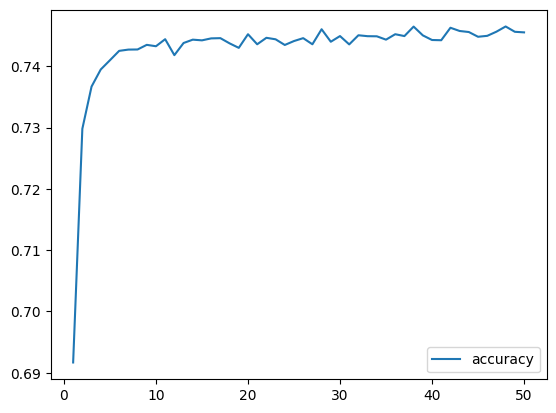

In [11]:
# M18D01A02
history_df = pd.DataFrame(fit_nn_model.history)
history_df.index += 1
history_df.plot(y="accuracy")